# Sampling and Hypothesis Testing

In [1]:
#Libraries
import numpy as np 
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd 
pd.options.mode.chained_assignment = None  # default='warn'
import re
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_1samp
import os
import plotly.graph_objects as go
import chart_studio.plotly as py
from prettytable import PrettyTable

# Visa Shopping

Visa shopping: It is where someone would apply in a specific consulate in order to have higher odds of getting the visa or getting a higher tier visa in general. The idea itself seemed to have a lot of rumours around it and the only way to consider it a myth/reality is by doing proper analysis over real data. Luckily, the data is here.

# Your job is to appropriately sample and run hypothesis testing to prove/disprove whether Visa-shopping is real. 

We are trying to figure out the best consulates to apply for to have the highest odds for receiving a uniform visa in general, or a multiple entry visa (MEV) in particular.

In [2]:
df = pd.read_csv("2018-data-for-consulates.csv")
df.head()

,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV) \n,Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Not issued rate for uniform visas,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas
0,Austria,ALBANIA,TIRANA,NaN,NaN,NaN,NaN,NaN,62,32,10,31.3%,21,9,14.5%,62,53,9,14.5%
1,Austria,ALGERIA,ALGIERS,NaN,NaN,NaN,NaN,NaN,2481,1658,1461,88.1%,1,822,33.1%,"2,481","1,659",822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,NaN,NaN,NaN,NaN,NaN,16,16,16,100.0%,NaN,NaN,NaN,16,16,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,NaN,NaN,NaN,NaN,NaN,2776,2653,989,37.3%,1,122,4.4%,"2,776","2,654",122,4.4%
4,Austria,AZERBAIJAN,BAKU,1,1,1,NaN,NaN,1976,1895,1769,93.4%,2,79,4.0%,"1,977","1,898",79,4.0%


# Data Cleaning: 


It is a good technique to strip column names of trailing white spaces and "\n" characters. Do that in the cell provided below.
- Rename columns with white spaces for e.g. "Schengen State': 'sch_state'"
- Look into df.strip()

In [3]:
# Printing column names to visualize which has white spaces and newlines
for col in df.columns:
    print(col)
    
# Hence it can be seen that there is a newline char after 'Total  uniform visas issued (including MEV)'

Schengen State
Country where consulate is located
Consulate
Airport transit visas (ATVs) applied for 
 ATVs issued (including multiple)
Multiple ATVs issued
ATVs not issued 
Not issued rate for ATVs
Uniform visas applied for
Total  uniform visas issued (including MEV) 

Multiple entry uniform visas (MEVs) issued
Share of MEVs on total number of uniform visas issued
Total LTVs issued
Uniform visas not issued
Not issued rate for uniform visas
Total ATVs and uniform visas applied for
Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) 
Total ATVs and uniform visas not issued
Not issued rate for ATVs and uniform visas 


In [4]:
# Code here

# Stripping newlines and white spaces from both ends of the column names
df.rename(columns=lambda x: x.strip(), inplace=True)

# Renaming columns with white spaces
df.rename(columns={"Schengen State": "sch_state"}, inplace=True)
df.rename(columns={"Country where consulate is located": "consulate_country"}, inplace=True)
df.rename(columns={"Consulate": "consulate"}, inplace=True)
df.rename(columns={"Uniform visas applied for": "uv_applied"}, inplace=True)
df.rename(columns={"Total  uniform visas issued (including MEV)": "uv+mev_issued"}, inplace=True)
df.rename(columns={"Multiple entry uniform visas (MEVs) issued": "mev_issued"}, inplace=True)
df.rename(columns={"Share of MEVs on total number of uniform visas issued": "mev_share%"}, inplace=True)
df.rename(columns={"Total LTVs issued": "ltv_issued"}, inplace=True)
df.rename(columns={"Uniform visas not issued": "uv_not_issued"}, inplace=True)
df.rename(columns={"Not issued rate for uniform visas": "uv_not_issued%"}, inplace=True)

# Did not rename columns involving ATVs since they will be dropped soon

#for col in df.columns:
    #    toreplace = col
     #   replacewith = toreplace.replace(' ', '_')
      #  df.rename(columns={toreplace: replacewith}, inplace=True)


In [5]:
#df.head()
for col in df.columns:
    print(col)
    
# It can be seen that white spaces have been stripped off and replaced with an underscore (_) as well

sch_state
consulate_country
consulate
Airport transit visas (ATVs) applied for
ATVs issued (including multiple)
Multiple ATVs issued
ATVs not issued
Not issued rate for ATVs
uv_applied
uv+mev_issued
mev_issued
mev_share%
ltv_issued
uv_not_issued
uv_not_issued%
Total ATVs and uniform visas applied for
Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs)
Total ATVs and uniform visas not issued
Not issued rate for ATVs and uniform visas


We are not interested in Airport Transit Visas (ATV). Drop all the columns involving ATVs for e.g. Multiple ATVs issued, ATVs not issued,

In [6]:
#Code here

tomatch = 'ATVs'

# I will make use of regex for this portion
for col in df.columns:
    find = re.findall(tomatch, col)
    if not find:
        continue
    else:
        del df[col]


In [7]:
df.head()

# Hence all columns involving 'ATVs' are dropped

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%
0,Austria,ALBANIA,TIRANA,62,32,10,31.3%,21,9,14.5%
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1%,1,822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0%,NaN,NaN,NaN
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3%,1,122,4.4%
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4%,2,79,4.0%


# Missing Values

- Drop the rows where Schengen State is missing.
- Replace other missing values with zero.
- Print the summary for missing values after cleaning.

In [8]:
df.isnull().sum()

sch_state             13
consulate_country     13
consulate             10
uv_applied            14
uv+mev_issued         54
mev_issued           147
mev_share%           150
ltv_issued           846
uv_not_issued        361
uv_not_issued%       363
dtype: int64

In [9]:
# Code here

# Dropping where Schengen State is missing
df.dropna(subset = ['sch_state'], inplace=True)

# Replacing other missing values with zero
df.fillna(0, inplace = True) 


In [10]:
# Print Summary again
df.isnull().sum() 

sch_state            0
consulate_country    0
consulate            0
uv_applied           0
uv+mev_issued        0
mev_issued           0
mev_share%           0
ltv_issued           0
uv_not_issued        0
uv_not_issued%       0
dtype: int64

In [11]:
df.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%
0,Austria,ALBANIA,TIRANA,62,32,10,31.3%,21,9,14.5%
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1%,1,822,33.1%
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0%,0,0,0
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3%,1,122,4.4%
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4%,2,79,4.0%


# Changing data types

In [12]:
# There were some values which were in the form '22,800' so i just reformatted them to '22800' for easy addition etc

for col in df.columns:
    if col == 'sch_state' or col == 'consulate_country' or col == 'consulate':
        continue
    else:
        df[col] = df[col].str.replace(',','')

In [13]:
# Changing from object to str to int
# Will change values containing % sign afterwards

for col in df.columns:
    if col == 'sch_state' or col == 'consulate_country' or col == 'consulate':
        df[col] = df[col].astype(str)
    elif col == 'uv_not_issued%' or col == 'mev_share%':
        continue
    else:
        df[col] = df[col].astype(str)
        df[col] = df[col].str.replace('nan', '0')
        df[col] = df[col].astype(int)
       

In [14]:
# Stripping (%) sign from infront of values so that values could be easily used for calculations etc

for col in df.columns:
    if col == 'uv_not_issued%' or col == 'mev_share%':
        df[col] = df[col].str.replace('%','')

# Changing type from str to float
for col in df.columns:
    if col == 'uv_not_issued%' or col == 'mev_share%':
        df[col] = df[col].astype(float)

In [15]:
df.dtypes

sch_state             object
consulate_country     object
consulate             object
uv_applied             int32
uv+mev_issued          int32
mev_issued             int32
mev_share%           float64
ltv_issued             int32
uv_not_issued          int32
uv_not_issued%       float64
dtype: object

# Adding columns for "decisions" and "rejection_rate"

- Add columns of "decisions" and "rejection_rate"
- Decisions is total number of decisions taken - sum of visas issued, LTV's issued, Rejected
- Rejection rate is what percentage of *decisions* are rejected

In [16]:
# Code here

# for decisions

# I am not adding "Multiple_entry_uniform_visas_(MEVs)_issued" since MEVs are already included in
# "Total__uniform_visas_issued_(including_MEV)"

decisions = []
for i in range(len(df)):
    total = df.loc[i, "uv+mev_issued"] + df.loc[i, "ltv_issued"] + df.loc[i, "uv_not_issued"]
    decisions.append(total)
df['decisions'] = decisions

# for rejection_rate
rejectionrate = []
for i in range(len(df)):
    not_issued = df.loc[i, "uv_not_issued"]
    decision = df.loc[i, "decisions"]
    not_issued = not_issued
    decision = float(decision)
    rr = not_issued/decision
    final = rr * 100
    rejectionrate.append(final)
    
df['rejection_rate'] = rejectionrate

In [17]:
df.fillna(0, inplace = True)
df.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate
0,Austria,ALBANIA,TIRANA,62,32,10,31.3,21,9,14.5,62,14.516129
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1,1,822,33.1,2481,33.131802
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0,0,0,0.0,16,0.000000
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3,1,122,4.4,2776,4.394813
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4,2,79,4.0,1976,3.997976


There are some values in 'uv+mev_issued' column that are lesser than values in 'mev_issued' column. This seems unreasonable to include such values in our hypothesis testing so I am dropping all such records.

In [18]:
df = df[df['uv+mev_issued'] >= df['mev_issued']]
df.reset_index(drop=True, inplace = True) 
df.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate
0,Austria,ALBANIA,TIRANA,62,32,10,31.3,21,9,14.5,62,14.516129
1,Austria,ALGERIA,ALGIERS,2481,1658,1461,88.1,1,822,33.1,2481,33.131802
2,Austria,ARGENTINA,BUENOS AIRES,16,16,16,100.0,0,0,0.0,16,0.000000
3,Austria,AUSTRALIA,CANBERRA,2776,2653,989,37.3,1,122,4.4,2776,4.394813
4,Austria,AZERBAIJAN,BAKU,1976,1895,1769,93.4,2,79,4.0,1976,3.997976


# Hypothesis Testing

- We will be picking three countries.
- The three countries are Egypt, India and Japan.
- You need to test whether in there is a better _chance_ of getting a visa if you apply to a particukar consulate within that country or is it by chance.
- Add subheadings for each country

In order to answer this question correctly, we need to define the population and the sample we will use:
1. Population: Total number of applicants/rejects in all the country.
2. Sample: Total number of applicants/rejects in all the targeted consulates.
The null hypothesis, which is a prediction that there is no significant difference between a specific consulate over all other consulates and that these numbers could have happened out naturally due to fluctations in application qualities received.
In order to proceed with this, we need to make a rather **BIG** assumption, that all applications to all consulates have the same *average* quality or that they came from the same pool/population.




*Does this assumption make sense?*

_Write why or why not?_

*Write here*

* Answer : We need to make this assumption because to conduct our comparison test, we believe that there are no explicit 
differences between the sample and population. That is, we assume that the test group is not aware that they are the test group and we treat both the test and control group as equal. This would agree with our Null hypothesis which states that the differences in them are random Otherwise, this hypothesis test can't be applied to observe results.  

#  We can conduct this using univariate T-test.
You will use the scipy package.
This links will help you get started:
    - https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
    
    
You need to calculate the test statistic and choose an appropriate p-value. Mention why you think this is an appropriate p-value. Once you have the test statistic, you need to sample and test your hypothesis.
    

For each country:
   - Plot a piechart showing the consulates with the highest number of decisions.
   - You will be running your hypothesis tests w.r.t three attributes
       - Rejection rate (if you have a weak visa application)
       - Multi-Entry Visa Share (if you have a strong visa application)
       - Weighted Score: You are required to calculate a normalized engineered feature
           - (1-rejection_rate) * mevs_share
           - Normalize this score
        

You are required to submit an analysis of *EACH* country why you think your hypothesis were rejected/accepted. You can include geo-political factors in your report as well.

#  Egypt

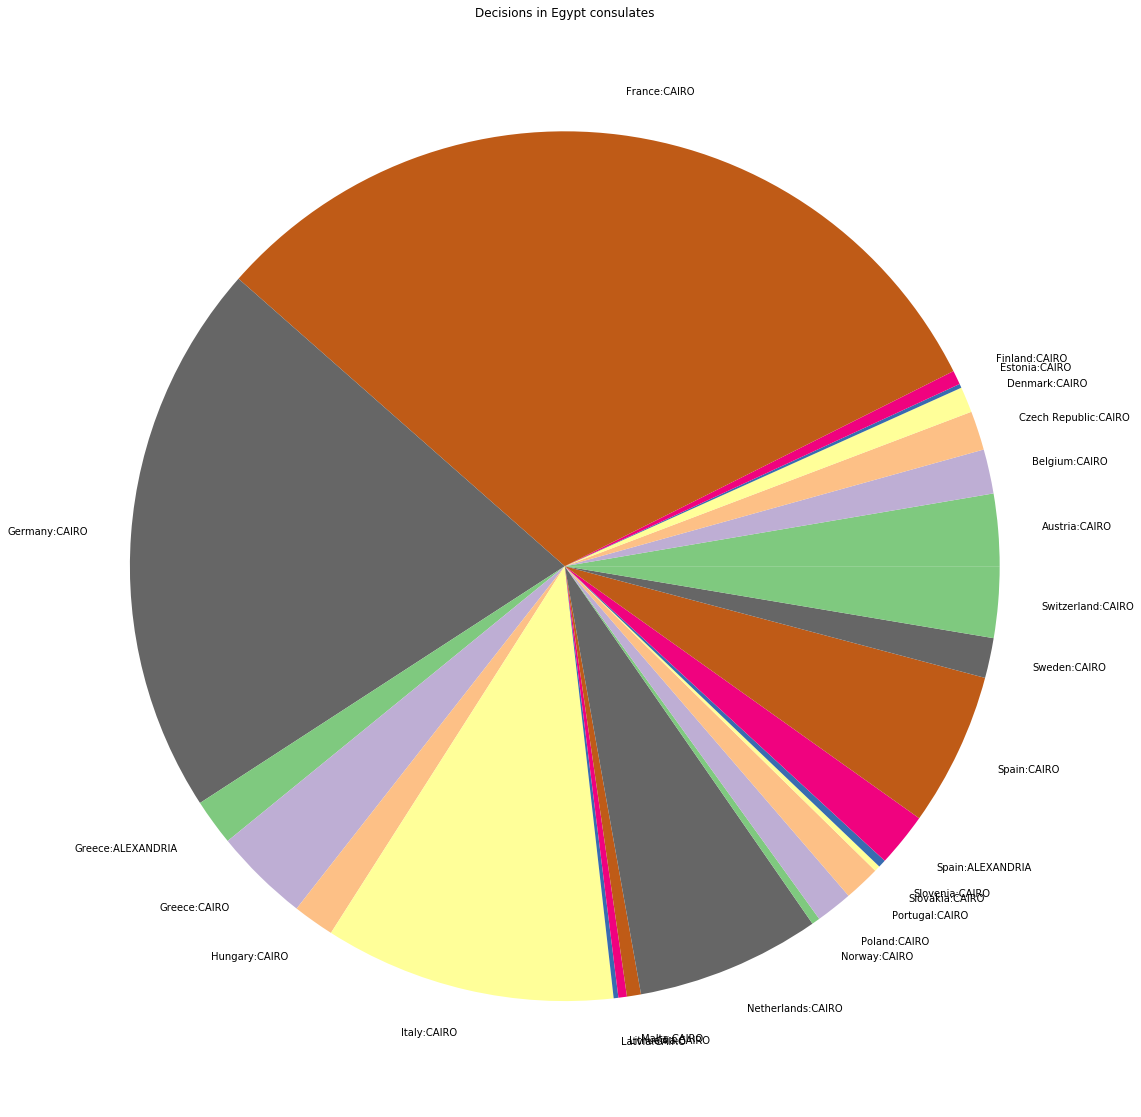

In [19]:
#Code here
egypt = df[df['consulate_country'] == 'EGYPT']
_ = plt.pie(egypt['decisions'],labels=egypt['sch_state'] + ":" + egypt['consulate'],colors=plt.cm.get_cmap('Accent').colors)
_ = plt.title("Decisions in Egypt consulates")
fig = plt.gcf()
fig.set_size_inches(20,20)

# Running hypothesis test wrt to rejection rate

In [20]:
# Rejected = visas not issued
# accepted = visas(including mevs) + ltvs issued
# rate = rejection rate divided by 100
# I am adding these 3 columns in a temporary dataframe for my easiness

egypt = df[df['consulate_country'] == 'EGYPT'] # filtering out sch_states for egypt
egypt.reset_index(drop=True, inplace = True) 

accepted = []
rejected = []
rate = []

for i in range(len(egypt)):
    value1 = egypt.loc[i, "uv+mev_issued"] + egypt.loc[i, "ltv_issued"]
    accepted.append(value1)
    value2 = egypt.loc[i, "uv_not_issued"] 
    rejected.append(value2)
    value3 = egypt.loc[i, "rejection_rate"]
    value3 = value3 / 100
    rate.append(value3)
    
egypt['accepted'] = accepted
egypt['rejected'] = rejected
egypt['rate'] = rate
egypt.head()


,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,accepted,rejected,rate
0,Austria,EGYPT,CAIRO,4993,4132,2872,69.5,39,822,16.5,4993,16.463048,4171,822,0.164630
1,Belgium,EGYPT,CAIRO,3250,1946,464,23.8,15,1111,34.2,3072,36.165365,1961,1111,0.361654
2,Czech Republic,EGYPT,CAIRO,2713,2015,433,21.5,3,693,25.5,2711,25.562523,2018,693,0.255625
3,Denmark,EGYPT,CAIRO,1790,1542,763,49.5,1,238,13.3,1781,13.363279,1543,238,0.133633
4,Estonia,EGYPT,CAIRO,279,198,68,34.3,7,74,26.5,279,26.523297,205,74,0.265233


Now for each consulate (lets say Austria as an example) I will see how many visas are accepted and how many are rejected.
Suppose 10 visas are rejected and 5 accepted, I will construct an array of 10 zeroes and 5 ones. 

Next I will calculate mean value statistic based on rejection rate of ALL consulates in Egypt.

After that I will pass the array and the mean value into a function which will return the p-value.

In [21]:
all_arrays = [] # contains arrays containing 0s and 1s for every consulate according to criteria defined above

for i in range(len(egypt)):
    accepted = egypt.loc[i, "accepted"] # this would be the number of ones in array
    rejected = egypt.loc[i, "rejected"] # this would be the number of zeroes in array 
    array = [] * (accepted+rejected) # array size is accepted + rejected
    for i in range(rejected):
        array.append(1)
    for i in range(accepted):
        array.append(0)
    all_arrays.append(array)
    
mean = egypt['rate'].mean()

In [22]:
j = 0
t = PrettyTable(['sch_state', 'Test Statistic', 'p-value', 'Null Accepted', 'Null Rejected'])
for i in all_arrays:
    test = all_arrays[j]
    tset, pval = ttest_1samp(test, mean)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
       t.add_row([egypt.loc[j, "sch_state"], tset, pval, '-', '✓'])
    else:
      t.add_row([egypt.loc[j, "sch_state"], tset, pval, '✓', '-'])
    j = j + 1
print(t)

+----------------+---------------------+-------------------------+---------------+---------------+
|   sch_state    |    Test Statistic   |         p-value         | Null Accepted | Null Rejected |
+----------------+---------------------+-------------------------+---------------+---------------+
|    Austria     |  -8.717475757821015 |  3.816348168889037e-18  |       -       |       ✓       |
|    Belgium     |  17.446567780851073 |  4.5441980106899625e-65 |       -       |       ✓       |
| Czech Republic |  5.398805679346684  |  7.289839564754892e-08  |       -       |       ✓       |
|    Denmark     |  -9.517034925943985 |  5.5673285376172306e-21 |       -       |       ✓       |
|    Estonia     |  2.071489785280612  |   0.03923537315400779   |       ✓       |       -       |
|    Finland     |  -6.995803721392049 |  4.8930474524623925e-12 |       -       |       ✓       |
|     France     |  -2.716815177490732 |   0.006593294531160141  |       -       |       ✓       |
|    Germa

# Running hypothesis test wrt to Multi-Entry Visa Share 

In [23]:
egypt = df[df['consulate_country'] == 'EGYPT'] # filtering out sch_states for egypt
egypt.reset_index(drop=True, inplace = True) 

mev_not_issued = []
rate = []

for i in range(len(egypt)):
    value1 = egypt.loc[i, "uv+mev_issued"] - egypt.loc[i, "mev_issued"]
    value2 = egypt.loc[i, "mev_share%"]
    value2 = value2 / 100
    rate.append(value2)
    mev_not_issued.append(value1)
    
egypt['mev_not_issued'] = mev_not_issued
egypt['rate'] = rate
egypt.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,mev_not_issued,rate
0,Austria,EGYPT,CAIRO,4993,4132,2872,69.5,39,822,16.5,4993,16.463048,1260,0.695
1,Belgium,EGYPT,CAIRO,3250,1946,464,23.8,15,1111,34.2,3072,36.165365,1482,0.238
2,Czech Republic,EGYPT,CAIRO,2713,2015,433,21.5,3,693,25.5,2711,25.562523,1582,0.215
3,Denmark,EGYPT,CAIRO,1790,1542,763,49.5,1,238,13.3,1781,13.363279,779,0.495
4,Estonia,EGYPT,CAIRO,279,198,68,34.3,7,74,26.5,279,26.523297,130,0.343


In [24]:
all_arrays = [] 

for i in range(len(egypt)):
    mev_issued = egypt.loc[i, "mev_issued"] # this would be the number of ones in array
    mev_not_issued = egypt.loc[i, "mev_not_issued"] # this would be the number of zeroes in array 
    array = [] * (mev_not_issued+mev_issued) # array size is accepted + rejected
    for i in range(mev_issued):
        array.append(1)
    for i in range(mev_not_issued):
        array.append(0)
    all_arrays.append(array)
    
ratio = egypt['rate'].mean()

In [25]:
j = 0
t = PrettyTable(['sch_state', 'Test Statistic', 'p-value', 'Null Accepted', 'Null Rejected'])
for i in all_arrays:
    test = all_arrays[j]
    tset, pval = ttest_1samp(test, ratio)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
       t.add_row([egypt.loc[j, "sch_state"], tset, pval, '-', '✓'])
    else:
      t.add_row([egypt.loc[j, "sch_state"], tset, pval, '✓', '-'])
    j = j + 1
print(t)

+----------------+---------------------+-------------------------+---------------+---------------+
|   sch_state    |    Test Statistic   |         p-value         | Null Accepted | Null Rejected |
+----------------+---------------------+-------------------------+---------------+---------------+
|    Austria     |  40.210314906918576 | 1.1736821064454438e-298 |       -       |       ✓       |
|    Belgium     | -17.449489641160984 |  1.8358134332445813e-63 |       -       |       ✓       |
| Czech Republic | -20.994316602169377 |  1.1757768765002833e-88 |       -       |       ✓       |
|    Denmark     |  6.891445976603601  |  8.024425638496697e-12  |       -       |       ✓       |
|    Estonia     | -1.8800435554542534 |   0.06157810959035467   |       ✓       |       -       |
|    Finland     |  -3.859378116446872 |  0.00012233642605024954 |       -       |       ✓       |
|     France     |  -52.27945897100593 |           0.0           |       -       |       ✓       |
|    Germa

# Running hypothesis test wrt to Weighted Score

In [26]:
egypt = df[df['consulate_country'] == 'EGYPT'] # filtering out sch_states for egypt
egypt.reset_index(drop=True, inplace = True) 

feature = []

for i in range(len(egypt)):
    value = egypt.loc[i, "rejection_rate"]
    value = value / 100
    value = 1 - value
    value2 = egypt.loc[i, "mev_share%"]
    value2 = value2 / 100
    final = value * value2
    feature.append(final)
    
egypt['feature'] = feature
egypt.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,feature
0,Austria,EGYPT,CAIRO,4993,4132,2872,69.5,39,822,16.5,4993,16.463048,0.580582
1,Belgium,EGYPT,CAIRO,3250,1946,464,23.8,15,1111,34.2,3072,36.165365,0.151926
2,Czech Republic,EGYPT,CAIRO,2713,2015,433,21.5,3,693,25.5,2711,25.562523,0.160041
3,Denmark,EGYPT,CAIRO,1790,1542,763,49.5,1,238,13.3,1781,13.363279,0.428852
4,Estonia,EGYPT,CAIRO,279,198,68,34.3,7,74,26.5,279,26.523297,0.252025


Normalizing the feature

In [27]:
x = (egypt.loc[:, ['feature']]).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
egypt['normalized'] = pd.DataFrame(x_scaled)
egypt.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,feature,normalized
0,Austria,EGYPT,CAIRO,4993,4132,2872,69.5,39,822,16.5,4993,16.463048,0.580582,0.748712
1,Belgium,EGYPT,CAIRO,3250,1946,464,23.8,15,1111,34.2,3072,36.165365,0.151926,0.169858
2,Czech Republic,EGYPT,CAIRO,2713,2015,433,21.5,3,693,25.5,2711,25.562523,0.160041,0.180815
3,Denmark,EGYPT,CAIRO,1790,1542,763,49.5,1,238,13.3,1781,13.363279,0.428852,0.543817
4,Estonia,EGYPT,CAIRO,279,198,68,34.3,7,74,26.5,279,26.523297,0.252025,0.305031


Performing Hypothesis

In [28]:
all_arrays = []
accepted = []
rejected = []
for i in range(len(egypt)):
    a = egypt.loc[i, "normalized"] * egypt.loc[i, "decisions"]
    r = (1 - egypt.loc[i, "normalized"]) * (egypt.loc[i, "decisions"]) 
    accepted.append(a)
    rejected.append(r)

egypt['accepted'] = accepted
egypt['rejected'] = rejected 

egypt['accepted'] = egypt['accepted'].astype(int)
egypt['rejected'] = egypt['rejected'].astype(int)

egypt.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,feature,normalized,accepted,rejected
0,Austria,EGYPT,CAIRO,4993,4132,2872,69.5,39,822,16.5,4993,16.463048,0.580582,0.748712,3738,1254
1,Belgium,EGYPT,CAIRO,3250,1946,464,23.8,15,1111,34.2,3072,36.165365,0.151926,0.169858,521,2550
2,Czech Republic,EGYPT,CAIRO,2713,2015,433,21.5,3,693,25.5,2711,25.562523,0.160041,0.180815,490,2220
3,Denmark,EGYPT,CAIRO,1790,1542,763,49.5,1,238,13.3,1781,13.363279,0.428852,0.543817,968,812
4,Estonia,EGYPT,CAIRO,279,198,68,34.3,7,74,26.5,279,26.523297,0.252025,0.305031,85,193


In [29]:
all_arrays = [] 

for i in range(len(egypt)):
    a = egypt.loc[i, "accepted"] # this would be the number of ones in array
    r = egypt.loc[i, "rejected"] # this would be the number of zeroes in array 
    array = [] 
    for i in range(a):
        array.append(1)
    for i in range(r):
        array.append(0)
    all_arrays.append(array)
    
ratio = egypt['normalized'].mean()

In [30]:
j = 0
t = PrettyTable(['sch_state', 'Test Statistic', 'p-value', 'Null Accepted', 'Null Rejected'])
for i in all_arrays:
    test = all_arrays[j]
    tset, pval = ttest_1samp(test, ratio)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
       t.add_row([egypt.loc[j, "sch_state"], tset, pval, '-', '✓'])
    else:
      t.add_row([egypt.loc[j, "sch_state"], tset, pval, '✓', '-'])
    j = j + 1
print(t)

+----------------+---------------------+-------------------------+---------------+---------------+
|   sch_state    |    Test Statistic   |         p-value         | Null Accepted | Null Rejected |
+----------------+---------------------+-------------------------+---------------+---------------+
|    Austria     |  56.58911799120288  |           0.0           |       -       |       ✓       |
|    Belgium     |  -34.21121400226589 | 1.3313838231405732e-217 |       -       |       ✓       |
| Czech Republic | -29.831339496352843 | 2.4820581005449234e-169 |       -       |       ✓       |
|    Denmark     |  12.060839457652204 |  2.9690155173825744e-32 |       -       |       ✓       |
|    Estonia     | -3.4549105332701697 |  0.0006367384354967014  |       -       |       ✓       |
|    Finland     | -2.2412762139343303 |   0.02523254891804218   |       ✓       |       -       |
|     France     |  -64.4717701104589  |           0.0           |       -       |       ✓       |
|    Germa

# Analysis For Egypt

From the countries that accepted Null Hypothesis, we can see that most of them barring Latvia are very far from Egypt.

For the countries that rejected Null Hypothesis, the reason might be that Egyption foreign affairs have become more strict in 
regards to viss due to visa shopping as we can see in the article linked below.

https://www.schengenvisainfo.com/news/egypt-urges-nationals-to-comply-with-schengen-travel-rules/

# India

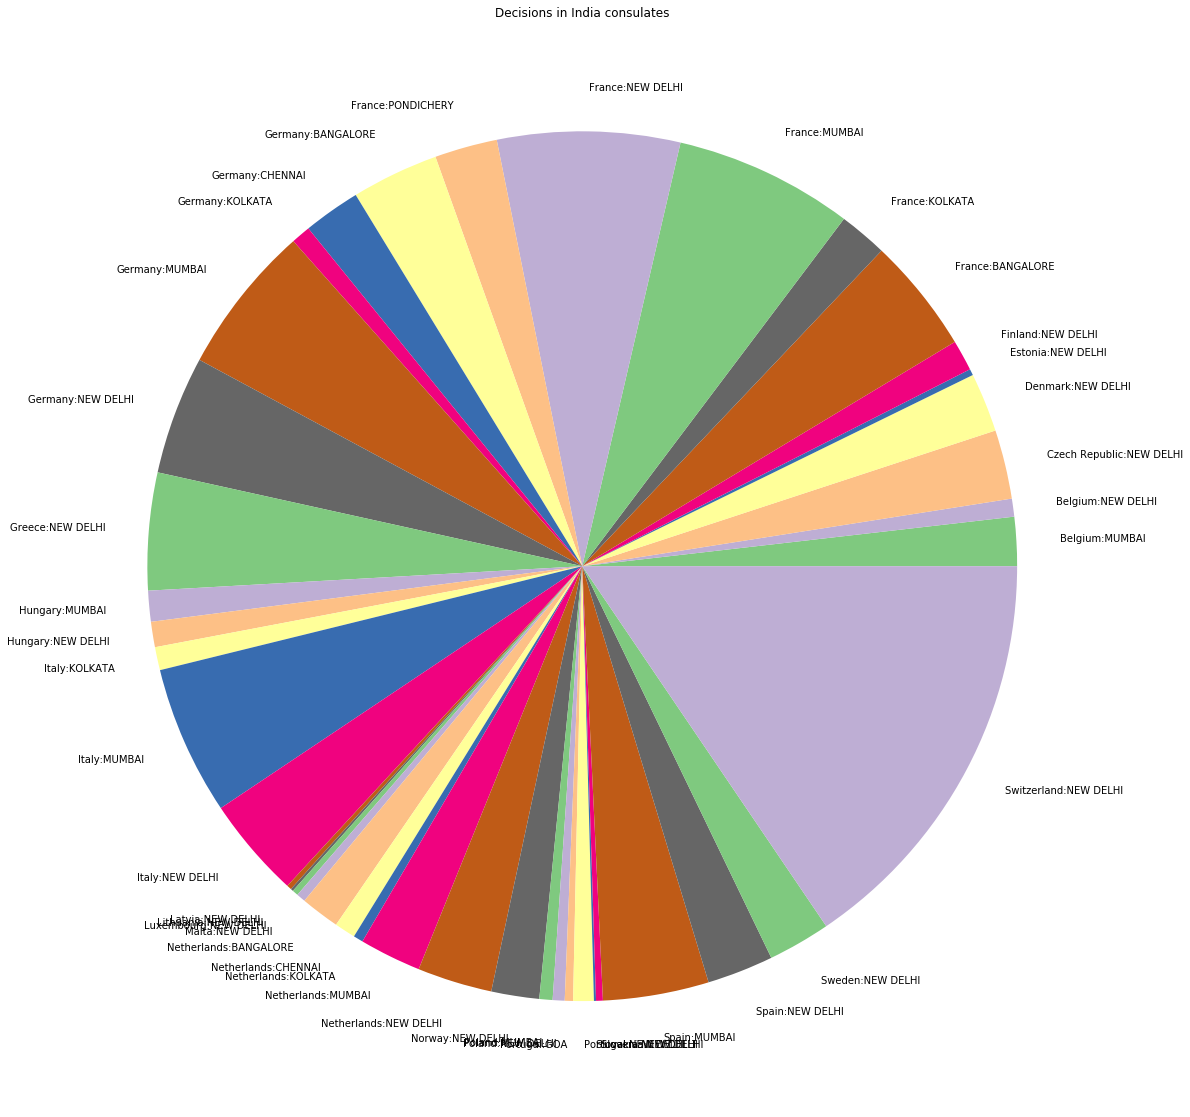

In [31]:
#Code here
india = df[df['consulate_country'] == 'INDIA']
_ = plt.pie(india['decisions'],labels=india['sch_state'] + ":" + india['consulate'],colors=plt.cm.get_cmap('Accent').colors)
_ = plt.title("Decisions in India consulates")
fig = plt.gcf()
fig.set_size_inches(20,20)

# Running hypothesis test wrt to rejection rate

In [32]:
# Rejected = visas not issued
# accepted = visas(including mevs) + ltvs issued
# rate = rejection rate divided by 100
# I am adding these 3 columns in a temporary dataframe for my easiness

india = df[df['consulate_country'] == 'INDIA'] # filtering out sch_states for india
india.reset_index(drop=True, inplace = True) 

accepted = []
rejected = []
rate = []

for i in range(len(india)):
    value1 = india.loc[i, "uv+mev_issued"] + india.loc[i, "ltv_issued"]
    accepted.append(value1)
    value2 = india.loc[i, "uv_not_issued"] 
    rejected.append(value2)
    value3 = india.loc[i, "rejection_rate"]
    value3 = value3 / 100
    rate.append(value3)
    
india['accepted'] = accepted
india['rejected'] = rejected
india['rate'] = rate
india.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,accepted,rejected,rate
0,Belgium,INDIA,MUMBAI,19162,18360,15892,86.6,0,551,2.9,18911,2.913648,18360,551,0.029136
1,Belgium,INDIA,NEW DELHI,7117,6052,4029,66.6,0,888,12.5,6940,12.795389,6052,888,0.127954
2,Czech Republic,INDIA,NEW DELHI,26683,20449,2035,10.0,0,6219,23.3,26668,23.320084,20449,6219,0.233201
3,Denmark,INDIA,NEW DELHI,23275,21890,18884,86.3,1,949,4.1,22840,4.154991,21891,949,0.041550
4,Estonia,INDIA,NEW DELHI,2425,1524,984,64.6,3,898,37.0,2425,37.030928,1527,898,0.370309


Now for each consulate (lets say Belgium as an example) I will see how many visas are accepted and how many are rejected. Suppose 10 visas are rejected and 5 accepted, I will construct an array of 10 zeroes and 5 ones.

Next I will calculate mean value statistic based on rejection rate of ALL consulates in India.

After that I will pass the array and the mean value into a function which will return the p-value.

In [33]:
all_arrays = [] # contains arrays containing 0s and 1s for every consulate according to criteria defined above

for i in range(len(india)):
    accepted = india.loc[i, "accepted"] # this would be the number of ones in array
    rejected = india.loc[i, "rejected"] # this would be the number of zeroes in array 
    array = [] * (accepted+rejected) # array size is accepted + rejected
    for i in range(rejected):
        array.append(1)
    for i in range(accepted):
        array.append(0)
    all_arrays.append(array)
    
mean = india['rate'].mean()

In [34]:
j = 0
t = PrettyTable(['sch_state', 'Test Statistic', 'p-value', 'Null Accepted', 'Null Rejected'])
for i in all_arrays:
    test = all_arrays[j]
    tset, pval = ttest_1samp(test, mean)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
       t.add_row([india.loc[j, "sch_state"], tset, pval, '-', '✓'])
    else:
      t.add_row([india.loc[j, "sch_state"], tset, pval, '✓', '-'])
    j = j + 1
print(t)

+----------------+---------------------+-------------------------+---------------+---------------+
|   sch_state    |    Test Statistic   |         p-value         | Null Accepted | Null Rejected |
+----------------+---------------------+-------------------------+---------------+---------------+
|    Belgium     |  -76.53664906583514 |           0.0           |       -       |       ✓       |
|    Belgium     |  1.2986444066634664 |   0.19410914541554872   |       ✓       |       -       |
| Czech Republic |  42.65449952891543  |           0.0           |       -       |       ✓       |
|    Denmark     |  -61.49012131126137 |           0.0           |       -       |       ✓       |
|    Estonia     |  25.24097305922581  |  5.231267128283246e-125 |       -       |       ✓       |
|    Finland     |  -42.92206207803673 |           0.0           |       -       |       ✓       |
|     France     |  -66.02499594036586 |           0.0           |       -       |       ✓       |
|     Fran

# Running hypothesis test wrt to Multi-Entry Visa Share

In [35]:
india = df[df['consulate_country'] == 'INDIA'] # filtering out sch_states for india
india.reset_index(drop=True, inplace = True) 

mev_not_issued = []
rate = []

for i in range(len(india)):
    value1 = india.loc[i, "uv+mev_issued"] - india.loc[i, "mev_issued"]
    value2 = india.loc[i, "mev_share%"]
    value2 = value2 / 100
    rate.append(value2)
    mev_not_issued.append(value1)
    
india['mev_not_issued'] = mev_not_issued
india['rate'] = rate
india.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,mev_not_issued,rate
0,Belgium,INDIA,MUMBAI,19162,18360,15892,86.6,0,551,2.9,18911,2.913648,2468,0.866
1,Belgium,INDIA,NEW DELHI,7117,6052,4029,66.6,0,888,12.5,6940,12.795389,2023,0.666
2,Czech Republic,INDIA,NEW DELHI,26683,20449,2035,10.0,0,6219,23.3,26668,23.320084,18414,0.100
3,Denmark,INDIA,NEW DELHI,23275,21890,18884,86.3,1,949,4.1,22840,4.154991,3006,0.863
4,Estonia,INDIA,NEW DELHI,2425,1524,984,64.6,3,898,37.0,2425,37.030928,540,0.646


In [36]:
all_arrays = [] 

for i in range(len(india)):
    mev_issued = india.loc[i, "mev_issued"] # this would be the number of ones in array
    mev_not_issued = india.loc[i, "mev_not_issued"] # this would be the number of zeroes in array 
    array = [] * (mev_not_issued+mev_issued) # array size is accepted + rejected
    for i in range(mev_issued):
        array.append(1)
    for i in range(mev_not_issued):
        array.append(0)
    all_arrays.append(array)
    
ratio = india['rate'].mean()

In [37]:
j = 0
t = PrettyTable(['sch_state', 'Test Statistic', 'p-value', 'Null Accepted', 'Null Rejected'])
for i in all_arrays:
    test = all_arrays[j]
    tset, pval = ttest_1samp(test, ratio)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
       t.add_row([india.loc[j, "sch_state"], tset, pval, '-', '✓'])
    else:
      t.add_row([india.loc[j, "sch_state"], tset, pval, '✓', '-'])
    j = j + 1
print(t)

+----------------+---------------------+-------------------------+---------------+---------------+
|   sch_state    |    Test Statistic   |         p-value         | Null Accepted | Null Rejected |
+----------------+---------------------+-------------------------+---------------+---------------+
|    Belgium     |  111.58442396897368 |           0.0           |       -       |       ✓       |
|    Belgium     |  13.367253513317014 |  3.4756011108705764e-40 |       -       |       ✓       |
| Czech Republic | -231.74905237046917 |           0.0           |       -       |       ✓       |
|    Denmark     |  119.50283552065063 |           0.0           |       -       |       ✓       |
|    Estonia     |  4.977244905215333  |   7.1822789685586e-07   |       -       |       ✓       |
|    Finland     |  24.41100538323921  |  2.492194513643449e-128 |       -       |       ✓       |
|     France     | -306.81821997589867 |           0.0           |       -       |       ✓       |
|     Fran

# Running hypothesis test wrt to Weighted Score

In [38]:
india = df[df['consulate_country'] == 'INDIA'] # filtering out sch_states for india
india.reset_index(drop=True, inplace = True) 

feature = []

for i in range(len(india)):
    value = india.loc[i, "rejection_rate"]
    value = value / 100
    value = 1 - value
    value2 = india.loc[i, "mev_share%"]
    value2 = value2 / 100
    final = value * value2
    feature.append(final)
    
india['feature'] = feature
india.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,feature
0,Belgium,INDIA,MUMBAI,19162,18360,15892,86.6,0,551,2.9,18911,2.913648,0.840768
1,Belgium,INDIA,NEW DELHI,7117,6052,4029,66.6,0,888,12.5,6940,12.795389,0.580783
2,Czech Republic,INDIA,NEW DELHI,26683,20449,2035,10.0,0,6219,23.3,26668,23.320084,0.076680
3,Denmark,INDIA,NEW DELHI,23275,21890,18884,86.3,1,949,4.1,22840,4.154991,0.827142
4,Estonia,INDIA,NEW DELHI,2425,1524,984,64.6,3,898,37.0,2425,37.030928,0.406780


Normalizing

In [39]:
x = (india.loc[:, ['feature']]).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
india['normalized'] = pd.DataFrame(x_scaled)
india.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,feature,normalized
0,Belgium,INDIA,MUMBAI,19162,18360,15892,86.6,0,551,2.9,18911,2.913648,0.840768,0.890970
1,Belgium,INDIA,NEW DELHI,7117,6052,4029,66.6,0,888,12.5,6940,12.795389,0.580783,0.611996
2,Czech Republic,INDIA,NEW DELHI,26683,20449,2035,10.0,0,6219,23.3,26668,23.320084,0.076680,0.071074
3,Denmark,INDIA,NEW DELHI,23275,21890,18884,86.3,1,949,4.1,22840,4.154991,0.827142,0.876349
4,Estonia,INDIA,NEW DELHI,2425,1524,984,64.6,3,898,37.0,2425,37.030928,0.406780,0.425284


Performing Hypothesis

In [40]:
all_arrays = []
accepted = []
rejected = []
for i in range(len(india)):
    a = india.loc[i, "normalized"] * india.loc[i, "decisions"]
    r = (1 - india.loc[i, "normalized"]) * (india.loc[i, "decisions"]) 
    accepted.append(a)
    rejected.append(r)

india['accepted'] = accepted
india['rejected'] = rejected 

india['accepted'] = india['accepted'].astype(int)
india['rejected'] = india['rejected'].astype(int)

india.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,feature,normalized,accepted,rejected
0,Belgium,INDIA,MUMBAI,19162,18360,15892,86.6,0,551,2.9,18911,2.913648,0.840768,0.890970,16849,2061
1,Belgium,INDIA,NEW DELHI,7117,6052,4029,66.6,0,888,12.5,6940,12.795389,0.580783,0.611996,4247,2692
2,Czech Republic,INDIA,NEW DELHI,26683,20449,2035,10.0,0,6219,23.3,26668,23.320084,0.076680,0.071074,1895,24772
3,Denmark,INDIA,NEW DELHI,23275,21890,18884,86.3,1,949,4.1,22840,4.154991,0.827142,0.876349,20015,2824
4,Estonia,INDIA,NEW DELHI,2425,1524,984,64.6,3,898,37.0,2425,37.030928,0.406780,0.425284,1031,1393


In [41]:
all_arrays = [] 

for i in range(len(india)):
    a = india.loc[i, "accepted"] # this would be the number of ones in array
    r = india.loc[i, "rejected"] # this would be the number of zeroes in array 
    array = [] 
    for i in range(a):
        array.append(1)
    for i in range(r):
        array.append(0)
    all_arrays.append(array)
    
ratio = india['normalized'].mean()

In [42]:
j = 0
t = PrettyTable(['sch_state', 'Test Statistic', 'p-value', 'Null Accepted', 'Null Rejected'])
for i in all_arrays:
    test = all_arrays[j]
    tset, pval = ttest_1samp(test, ratio)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
       t.add_row([india.loc[j, "sch_state"], tset, pval, '-', '✓'])
    else:
      t.add_row([india.loc[j, "sch_state"], tset, pval, '✓', '-'])
    j = j + 1
print(t)

+----------------+---------------------+-------------------------+---------------+---------------+
|   sch_state    |    Test Statistic   |         p-value         | Null Accepted | Null Rejected |
+----------------+---------------------+-------------------------+---------------+---------------+
|    Belgium     |  151.7137984071493  |           0.0           |       -       |       ✓       |
|    Belgium     |  11.085794229200127 |  2.5399720577616606e-28 |       -       |       ✓       |
| Czech Republic | -302.61905134075016 |           0.0           |       -       |       ✓       |
|    Denmark     |  151.11213843134163 |           0.0           |       -       |       ✓       |
|    Estonia     | -12.133386437378583 |  6.210947547888344e-33  |       -       |       ✓       |
|    Finland     |   35.6894809084899  | 3.9427668126213454e-265 |       -       |       ✓       |
|     France     |  -307.6213741898786 |           0.0           |       -       |       ✓       |
|     Fran

# Analysis For India

From my point of view, Null Hypothesis was rejected in India because every year millions of Indians apply for visa as can be seen from this link : https://qz.com/india/1603047/schengen-countries-list-that-indians-are-crazy-about/

This leads to a longer processing and waiting time which mostly people don't want to go through and therefore, tend to do it the illegal way or a substitute way. This is where visa shopping comes into play.

# Japan

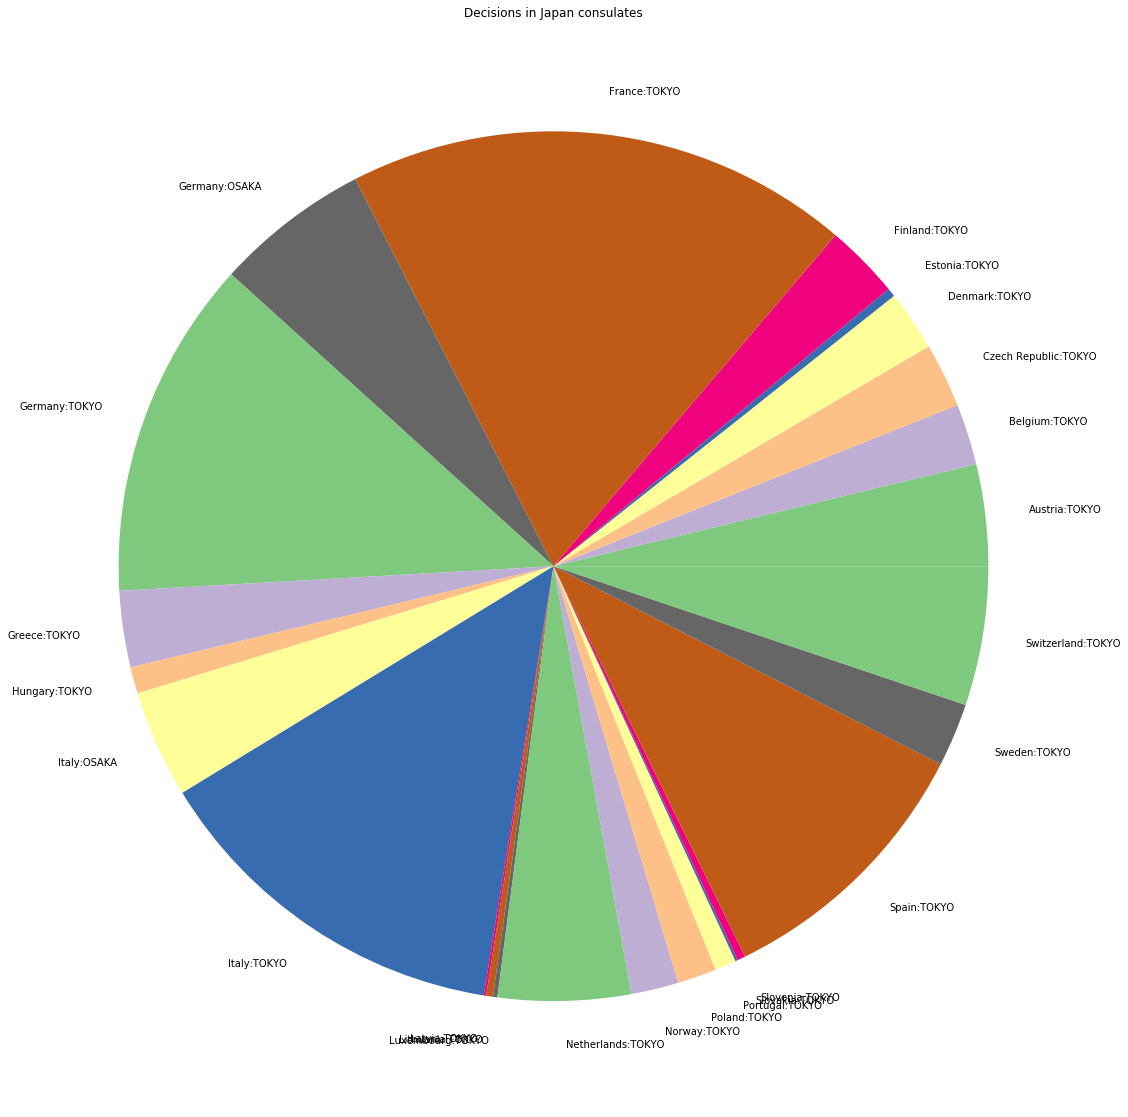

In [43]:
#Code here
japan = df[df['consulate_country'] == 'JAPAN']
_ = plt.pie(japan['decisions'],labels=japan['sch_state'] + ":" + japan['consulate'],colors=plt.cm.get_cmap('Accent').colors)
_ = plt.title("Decisions in Japan consulates")
fig = plt.gcf()
fig.set_size_inches(20,20)

# Running hypothesis test wrt to rejection rate

In [44]:
# Rejected = visas not issued
# accepted = visas(including mevs) + ltvs issued
# rate = rejection rate divided by 100
# I am adding these 3 columns in a temporary dataframe for my easiness

japan = df[df['consulate_country'] == 'JAPAN'] # filtering out sch_states for japan
japan.reset_index(drop=True, inplace = True) 

accepted = []
rejected = []
rate = []

for i in range(len(egypt)):
    value1 = japan.loc[i, "uv+mev_issued"] + japan.loc[i, "ltv_issued"]
    accepted.append(value1)
    value2 = japan.loc[i, "uv_not_issued"] 
    rejected.append(value2)
    value3 = japan.loc[i, "rejection_rate"]
    value3 = value3 / 100
    rate.append(value3)
    
japan['accepted'] = accepted
japan['rejected'] = rejected
japan['rate'] = rate
japan.head()


,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,accepted,rejected,rate
0,Austria,JAPAN,TOKYO,543,543,38,7.0,0,0,0.0,543,0.000000,543,0,0.000000
1,Belgium,JAPAN,TOKYO,338,311,183,58.8,0,15,4.4,326,4.601227,311,15,0.046012
2,Czech Republic,JAPAN,TOKYO,345,345,31,9.0,0,0,0.0,345,0.000000,345,0,0.000000
3,Denmark,JAPAN,TOKYO,321,321,27,8.4,0,2,0.6,323,0.619195,321,2,0.006192
4,Estonia,JAPAN,TOKYO,46,45,16,35.6,0,1,2.2,46,2.173913,45,1,0.021739


Now for each consulate (lets say Austria as an example) I will see how many visas are accepted and how many are rejected. Suppose 10 visas are rejected and 5 accepted, I will construct an array of 10 zeroes and 5 ones.

Next I will calculate mean value statistic based on rejection rate of ALL consulates in Japan.

After that I will pass the array and the mean value into a function which will return the p-value.

In [45]:
all_arrays = [] # contains arrays containing 0s and 1s for every consulate according to criteria defined above

for i in range(len(japan)):
    accepted = japan.loc[i, "accepted"] # this would be the number of ones in array
    rejected = japan.loc[i, "rejected"] # this would be the number of zeroes in array 
    array = [] * (accepted+rejected) # array size is accepted + rejected
    for i in range(rejected):
        array.append(1)
    for i in range(accepted):
        array.append(0)
    all_arrays.append(array)
    
mean = japan['rate'].mean()

In [46]:
j = 0
t = PrettyTable(['sch_state', 'Test Statistic', 'p-value', 'Null Accepted', 'Null Rejected'])
for i in all_arrays:
    test = all_arrays[j]
    tset, pval = ttest_1samp(test, mean)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
       t.add_row([japan.loc[j, "sch_state"], tset, pval, '-', '✓'])
    else:
      t.add_row([japan.loc[j, "sch_state"], tset, pval, '✓', '-'])
    j = j + 1
print(t)

+----------------+---------------------+------------------------+---------------+---------------+
|   sch_state    |    Test Statistic   |        p-value         | Null Accepted | Null Rejected |
+----------------+---------------------+------------------------+---------------+---------------+
|    Austria     |         -inf        |          0.0           |       -       |       ✓       |
|    Belgium     |  1.9459289743649717 |  0.052524983628885746  |       ✓       |       -       |
| Czech Republic |         -inf        |          0.0           |       -       |       ✓       |
|    Denmark     | -3.9357700140675194 | 0.0001016480242153793  |       -       |       ✓       |
|    Estonia     |  -0.076281756410058 |   0.9395330812903011   |       ✓       |       -       |
|    Finland     |   0.78000795853803  |  0.43584980107970983   |       ✓       |       -       |
|     France     |  4.320303393750518  |  1.61444008254817e-05  |       -       |       ✓       |
|    Germany     | -

# Running hypothesis test wrt to Multi-Entry Visa Share

In [47]:
japan = df[df['consulate_country'] == 'JAPAN'] # filtering out sch_states for japan
japan.reset_index(drop=True, inplace = True) 

mev_not_issued = []
rate = []

for i in range(len(japan)):
    value1 = japan.loc[i, "uv+mev_issued"] - japan.loc[i, "mev_issued"]
    value2 = japan.loc[i, "mev_share%"]
    value2 = value2 / 100
    rate.append(value2)
    mev_not_issued.append(value1)
    
japan['mev_not_issued'] = mev_not_issued
japan['rate'] = rate
japan.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,mev_not_issued,rate
0,Austria,JAPAN,TOKYO,543,543,38,7.0,0,0,0.0,543,0.000000,505,0.070
1,Belgium,JAPAN,TOKYO,338,311,183,58.8,0,15,4.4,326,4.601227,128,0.588
2,Czech Republic,JAPAN,TOKYO,345,345,31,9.0,0,0,0.0,345,0.000000,314,0.090
3,Denmark,JAPAN,TOKYO,321,321,27,8.4,0,2,0.6,323,0.619195,294,0.084
4,Estonia,JAPAN,TOKYO,46,45,16,35.6,0,1,2.2,46,2.173913,29,0.356


In [48]:
all_arrays = [] 

for i in range(len(japan)):
    mev_issued = japan.loc[i, "mev_issued"] # this would be the number of ones in array
    mev_not_issued = japan.loc[i, "mev_not_issued"] # this would be the number of zeroes in array 
    array = [] * (mev_not_issued+mev_issued) # array size is accepted + rejected
    for i in range(mev_issued):
        array.append(1)
    for i in range(mev_not_issued):
        array.append(0)
    all_arrays.append(array)
    
ratio = japan['rate'].mean()

In [49]:
j = 0
t = PrettyTable(['sch_state', 'Test Statistic', 'p-value', 'Null Accepted', 'Null Rejected'])
for i in all_arrays:
    test = all_arrays[j]
    tset, pval = ttest_1samp(test, ratio)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
       t.add_row([japan.loc[j, "sch_state"], tset, pval, '-', '✓'])
    else:
      t.add_row([japan.loc[j, "sch_state"], tset, pval, '✓', '-'])
    j = j + 1
print(t)

+----------------+---------------------+------------------------+---------------+---------------+
|   sch_state    |    Test Statistic   |        p-value         | Null Accepted | Null Rejected |
+----------------+---------------------+------------------------+---------------+---------------+
|    Austria     |  -28.90066773229981 | 7.660989983783721e-112 |       -       |       ✓       |
|    Belgium     |  7.217923503015383  | 4.091872491225351e-12  |       -       |       ✓       |
| Czech Republic | -19.250987670218983 | 1.4585640512677431e-56 |       -       |       ✓       |
|    Denmark     | -19.500567676440536 | 2.300303034295738e-56  |       -       |       ✓       |
|    Estonia     | -0.4313019979646226 |   0.6683546839972678   |       ✓       |       -       |
|    Finland     | -11.636374970435208 | 6.684544237144408e-27  |       -       |       ✓       |
|     France     |  -14.28391571077841 | 1.3023144187863417e-44 |       -       |       ✓       |
|    Germany     |  

# Running hypothesis test wrt to Weighted Score

In [50]:
japan = df[df['consulate_country'] == 'JAPAN'] # filtering out sch_states for japan
japan.reset_index(drop=True, inplace = True) 

feature = []

for i in range(len(japan)):
    value = japan.loc[i, "rejection_rate"]
    value = value / 100
    value = 1 - value
    value2 = japan.loc[i, "mev_share%"]
    value2 = value2 / 100
    final = value * value2
    feature.append(final)
    
japan['feature'] = feature
japan.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,feature
0,Austria,JAPAN,TOKYO,543,543,38,7.0,0,0,0.0,543,0.000000,0.070000
1,Belgium,JAPAN,TOKYO,338,311,183,58.8,0,15,4.4,326,4.601227,0.560945
2,Czech Republic,JAPAN,TOKYO,345,345,31,9.0,0,0,0.0,345,0.000000,0.090000
3,Denmark,JAPAN,TOKYO,321,321,27,8.4,0,2,0.6,323,0.619195,0.083480
4,Estonia,JAPAN,TOKYO,46,45,16,35.6,0,1,2.2,46,2.173913,0.348261


Normalizing

In [51]:
x = (japan.loc[:, ['feature']]).values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
japan['normalized'] = pd.DataFrame(x_scaled)
japan.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,feature,normalized
0,Austria,JAPAN,TOKYO,543,543,38,7.0,0,0,0.0,543,0.000000,0.070000,0.070000
1,Belgium,JAPAN,TOKYO,338,311,183,58.8,0,15,4.4,326,4.601227,0.560945,0.560945
2,Czech Republic,JAPAN,TOKYO,345,345,31,9.0,0,0,0.0,345,0.000000,0.090000,0.090000
3,Denmark,JAPAN,TOKYO,321,321,27,8.4,0,2,0.6,323,0.619195,0.083480,0.083480
4,Estonia,JAPAN,TOKYO,46,45,16,35.6,0,1,2.2,46,2.173913,0.348261,0.348261


Performing Hypothesis

In [52]:
all_arrays = []
accepted = []
rejected = []
for i in range(len(japan)):
    a = japan.loc[i, "normalized"] * japan.loc[i, "decisions"]
    r = (1 - japan.loc[i, "normalized"]) * (japan.loc[i, "decisions"]) 
    accepted.append(a)
    rejected.append(r)

japan['accepted'] = accepted
japan['rejected'] = rejected 

japan['accepted'] = japan['accepted'].astype(int)
japan['rejected'] = japan['rejected'].astype(int)

japan.head()

,sch_state,consulate_country,consulate,uv_applied,uv+mev_issued,mev_issued,mev_share%,ltv_issued,uv_not_issued,uv_not_issued%,decisions,rejection_rate,feature,normalized,accepted,rejected
0,Austria,JAPAN,TOKYO,543,543,38,7.0,0,0,0.0,543,0.000000,0.070000,0.070000,38,504
1,Belgium,JAPAN,TOKYO,338,311,183,58.8,0,15,4.4,326,4.601227,0.560945,0.560945,182,143
2,Czech Republic,JAPAN,TOKYO,345,345,31,9.0,0,0,0.0,345,0.000000,0.090000,0.090000,31,313
3,Denmark,JAPAN,TOKYO,321,321,27,8.4,0,2,0.6,323,0.619195,0.083480,0.083480,26,296
4,Estonia,JAPAN,TOKYO,46,45,16,35.6,0,1,2.2,46,2.173913,0.348261,0.348261,16,29


In [53]:
all_arrays = [] 

for i in range(len(japan)):
    a = japan.loc[i, "accepted"] # this would be the number of ones in array
    r = japan.loc[i, "rejected"] # this would be the number of zeroes in array 
    array = [] 
    for i in range(a):
        array.append(1)
    for i in range(r):
        array.append(0)
    all_arrays.append(array)
    
ratio = japan['normalized'].mean()

In [54]:
j = 0
t = PrettyTable(['sch_state', 'Test Statistic', 'p-value', 'Null Accepted', 'Null Rejected'])
for i in all_arrays:
    test = all_arrays[j]
    tset, pval = ttest_1samp(test, ratio)
    if pval < 0.025:    # alpha value is 0.025 or 2.5%
       t.add_row([japan.loc[j, "sch_state"], tset, pval, '-', '✓'])
    else:
      t.add_row([japan.loc[j, "sch_state"], tset, pval, '✓', '-'])
    j = j + 1
print(t)

+----------------+----------------------+-------------------------+---------------+---------------+
|   sch_state    |    Test Statistic    |         p-value         | Null Accepted | Null Rejected |
+----------------+----------------------+-------------------------+---------------+---------------+
|    Austria     | -28.003686231739344  | 2.5158243002962036e-107 |       -       |       ✓       |
|    Belgium     |  6.616907194517274   |  1.518704950117196e-10  |       -       |       ✓       |
| Czech Republic |  -18.58885907485306  |  7.584427300764338e-54  |       -       |       ✓       |
|    Denmark     | -19.516875217960127  |  1.7619707617111014e-56 |       -       |       ✓       |
|    Estonia     | -0.30444086100819984 |    0.762227329956259    |       ✓       |       -       |
|    Finland     | -11.967213813571844  |  2.153569013479613e-28  |       -       |       ✓       |
|     France     | -14.937855403760443  |  1.5409900269415454e-48 |       -       |       ✓       |


# Analysis For Japan

Null was Rejected in most of the cases since many Japanese favor working in their hometown. Also most do not know english language so they are more focused on their native language so they go to schengen states less often. Furthermore, there maybe strict rules in Japan with regards to schengen states.

Also some geo factors are also responsible. Distance of Japan from schengen states is greater than that of India and Egypt. Hence Null is Rejected in most of the cases.